# Project: Google Analytics Customer Revenue Prediction:                                  Predicting how much GStore customers will spend

# Flattening the nested JSON columns and loading the input data

In [1]:
import os
import json
import numpy as np
import pandas as pd
from pandas.io.json import json_normalize
import matplotlib.pyplot as plt
import seaborn as sns
import gc
color = sns.color_palette()

%matplotlib inline


from sklearn import model_selection, preprocessing, metrics


pd.options.mode.chained_assignment = None
pd.options.display.max_columns = 999

gc.enable()
features = ['channelGrouping', 'date', 'fullVisitorId', 'visitId',\
       'visitNumber', 'visitStartTime', 'device.browser',\
       'device.deviceCategory', 'device.isMobile', 'device.operatingSystem',\
       'geoNetwork.city', 'geoNetwork.continent', 'geoNetwork.country',\
       'geoNetwork.metro', 'geoNetwork.networkDomain', 'geoNetwork.region',\
       'geoNetwork.subContinent', 'totals.bounces', 'totals.hits',\
       'totals.newVisits', 'totals.pageviews', 'totals.transactionRevenue',\
       'trafficSource.adContent', 'trafficSource.campaign',\
       'trafficSource.isTrueDirect', 'trafficSource.keyword',\
       'trafficSource.medium', 'trafficSource.referralPath',\
       'trafficSource.source']
def load_df(csv_path):
    JSON_COLUMNS = ['device', 'geoNetwork', 'totals', 'trafficSource']
    ans = pd.DataFrame()
    dfs = pd.read_csv(csv_path, sep=',',
                     converters={column: json.loads for column in JSON_COLUMNS}, 
                     dtype={'fullVisitorId': 'str'}, # Important!!
                    chunksize = 100000)
    for df in dfs:
        df.reset_index(drop = True,inplace = True)
        for column in JSON_COLUMNS:
            column_as_df = json_normalize(df[column])
            column_as_df.columns = [f"{column}.{subcolumn}" for subcolumn in column_as_df.columns]
            df = df.drop(column, axis=1).merge(column_as_df, right_index=True, left_index=True)

        print(f"Loaded {os.path.basename(csv_path)}. Shape: {df.shape}")
        use_df = df[features]
        del df
        gc.collect()
        ans = pd.concat([ans, use_df], axis = 0).reset_index(drop = True)
        print(ans.shape)
    return ans


In [2]:
%%time
train_df=load_df("F:\\Online Course\\datasets\\google customer revenue prediction\\train_v2.csv")

Loaded train_v2.csv. Shape: (100000, 59)
(100000, 29)
Loaded train_v2.csv. Shape: (100000, 60)
(200000, 29)
Loaded train_v2.csv. Shape: (100000, 59)
(300000, 29)
Loaded train_v2.csv. Shape: (100000, 59)
(400000, 29)
Loaded train_v2.csv. Shape: (100000, 59)
(500000, 29)
Loaded train_v2.csv. Shape: (100000, 59)
(600000, 29)
Loaded train_v2.csv. Shape: (100000, 59)
(700000, 29)
Loaded train_v2.csv. Shape: (100000, 59)
(800000, 29)
Loaded train_v2.csv. Shape: (100000, 59)
(900000, 29)
Loaded train_v2.csv. Shape: (100000, 59)
(1000000, 29)
Loaded train_v2.csv. Shape: (100000, 59)
(1100000, 29)
Loaded train_v2.csv. Shape: (100000, 59)
(1200000, 29)
Loaded train_v2.csv. Shape: (100000, 59)
(1300000, 29)
Loaded train_v2.csv. Shape: (100000, 59)
(1400000, 29)
Loaded train_v2.csv. Shape: (100000, 59)
(1500000, 29)
Loaded train_v2.csv. Shape: (100000, 59)
(1600000, 29)
Loaded train_v2.csv. Shape: (100000, 59)
(1700000, 29)
Loaded train_v2.csv. Shape: (8337, 59)
(1708337, 29)
Wall time: 22min 13s


In [3]:
train_df.head()


,channelGrouping,date,fullVisitorId,visitId,visitNumber,visitStartTime,device.browser,device.deviceCategory,device.isMobile,device.operatingSystem,geoNetwork.city,geoNetwork.continent,geoNetwork.country,geoNetwork.metro,geoNetwork.networkDomain,geoNetwork.region,geoNetwork.subContinent,totals.bounces,totals.hits,totals.newVisits,totals.pageviews,totals.transactionRevenue,trafficSource.adContent,trafficSource.campaign,trafficSource.isTrueDirect,trafficSource.keyword,trafficSource.medium,trafficSource.referralPath,trafficSource.source
0,Organic Search,20171016,3162355547410993243,1508198450,1,1508198450,Firefox,desktop,False,Windows,not available in demo dataset,Europe,Germany,not available in demo dataset,(not set),not available in demo dataset,Western Europe,1,1,1,1,NaN,NaN,(not set),NaN,water bottle,organic,NaN,google
1,Referral,20171016,8934116514970143966,1508176307,6,1508176307,Chrome,desktop,False,Chrome OS,Cupertino,Americas,United States,San Francisco-Oakland-San Jose CA,(not set),California,Northern America,NaN,2,NaN,2,NaN,NaN,(not set),NaN,NaN,referral,/a/google.com/transportation/mtv-services/bike...,sites.google.com
2,Direct,20171016,7992466427990357681,1508201613,1,1508201613,Chrome,mobile,True,Android,not available in demo dataset,Americas,United States,not available in demo dataset,windjammercable.net,not available in demo dataset,Northern America,NaN,2,1,2,NaN,NaN,(not set),True,NaN,(none),NaN,(direct)
3,Organic Search,20171016,9075655783635761930,1508169851,1,1508169851,Chrome,desktop,False,Windows,not available in demo dataset,Asia,Turkey,not available in demo dataset,unknown.unknown,not available in demo dataset,Western Asia,NaN,2,1,2,NaN,NaN,(not set),NaN,(not provided),organic,NaN,google
4,Organic Search,20171016,6960673291025684308,1508190552,1,1508190552,Chrome,desktop,False,Windows,not available in demo dataset,Americas,Mexico,not available in demo dataset,prod-infinitum.com.mx,not available in demo dataset,Central America,NaN,2,1,2,NaN,NaN,(not set),NaN,(not provided),organic,NaN,google


In [96]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1708337 entries, 0 to 1708336
Data columns (total 46 columns):
channelGrouping                object
date                           int64
fullVisitorId                  object
visitId                        int64
visitNumber                    int64
visitStartTime                 int64
device.browser                 object
device.deviceCategory          object
device.isMobile                bool
device.operatingSystem         object
geoNetwork.city                object
geoNetwork.continent           object
geoNetwork.country             object
geoNetwork.metro               object
geoNetwork.networkDomain       object
geoNetwork.region              object
geoNetwork.subContinent        object
totals.bounces                 object
totals.hits                    object
totals.newVisits               object
totals.pageviews               object
totals.transactionRevenue      float64
trafficSource.adContent        object
trafficSource.camp

In [97]:
train_df.isnull().sum()/len(train_df)

channelGrouping                0.00000
date                           0.00000
fullVisitorId                  0.00000
visitId                        0.00000
visitNumber                    0.00000
visitStartTime                 0.00000
device.browser                 0.00000
device.deviceCategory          0.00000
device.isMobile                0.00000
device.operatingSystem         0.00000
geoNetwork.city                0.00000
geoNetwork.continent           0.00000
geoNetwork.country             0.00000
geoNetwork.metro               0.00000
geoNetwork.networkDomain       0.00000
geoNetwork.region              0.00000
geoNetwork.subContinent        0.00000
totals.bounces                 0.00000
totals.hits                    0.00000
totals.newVisits               0.00000
totals.pageviews               0.00014
totals.transactionRevenue      0.00000
trafficSource.adContent        0.00000
trafficSource.campaign         0.00000
trafficSource.isTrueDirect     0.00000
trafficSource.keyword    

In [6]:
train_df['totals.transactionRevenue'].fillna('0',inplace=True)

In [7]:
train_df.head()

,channelGrouping,date,fullVisitorId,visitId,visitNumber,visitStartTime,device.browser,device.deviceCategory,device.isMobile,device.operatingSystem,geoNetwork.city,geoNetwork.continent,geoNetwork.country,geoNetwork.metro,geoNetwork.networkDomain,geoNetwork.region,geoNetwork.subContinent,totals.bounces,totals.hits,totals.newVisits,totals.pageviews,totals.transactionRevenue,trafficSource.adContent,trafficSource.campaign,trafficSource.isTrueDirect,trafficSource.keyword,trafficSource.medium,trafficSource.referralPath,trafficSource.source
0,Organic Search,20171016,3162355547410993243,1508198450,1,1508198450,Firefox,desktop,False,Windows,not available in demo dataset,Europe,Germany,not available in demo dataset,(not set),not available in demo dataset,Western Europe,1,1,1,1,0,NaN,(not set),NaN,water bottle,organic,NaN,google
1,Referral,20171016,8934116514970143966,1508176307,6,1508176307,Chrome,desktop,False,Chrome OS,Cupertino,Americas,United States,San Francisco-Oakland-San Jose CA,(not set),California,Northern America,NaN,2,NaN,2,0,NaN,(not set),NaN,NaN,referral,/a/google.com/transportation/mtv-services/bike...,sites.google.com
2,Direct,20171016,7992466427990357681,1508201613,1,1508201613,Chrome,mobile,True,Android,not available in demo dataset,Americas,United States,not available in demo dataset,windjammercable.net,not available in demo dataset,Northern America,NaN,2,1,2,0,NaN,(not set),True,NaN,(none),NaN,(direct)
3,Organic Search,20171016,9075655783635761930,1508169851,1,1508169851,Chrome,desktop,False,Windows,not available in demo dataset,Asia,Turkey,not available in demo dataset,unknown.unknown,not available in demo dataset,Western Asia,NaN,2,1,2,0,NaN,(not set),NaN,(not provided),organic,NaN,google
4,Organic Search,20171016,6960673291025684308,1508190552,1,1508190552,Chrome,desktop,False,Windows,not available in demo dataset,Americas,Mexico,not available in demo dataset,prod-infinitum.com.mx,not available in demo dataset,Central America,NaN,2,1,2,0,NaN,(not set),NaN,(not provided),organic,NaN,google


In [8]:
train_df['totals.transactionRevenue']=train_df['totals.transactionRevenue'].apply(lambda x: float(x))

In [9]:
train_df['y_user']=train_df['totals.transactionRevenue'].apply(lambda x:np.log(x+1))

In [10]:
train_df['y_user'].max()

23.86437469605166

In [11]:
type(train_df['totals.transactionRevenue'])

pandas.core.series.Series

In [12]:
train_df['channelGrouping'].unique()

array(['Organic Search', 'Referral', 'Direct', 'Paid Search', 'Display',
       'Affiliates', 'Social', '(Other)'], dtype=object)

In [13]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1708337 entries, 0 to 1708336
Data columns (total 30 columns):
channelGrouping               object
date                          int64
fullVisitorId                 object
visitId                       int64
visitNumber                   int64
visitStartTime                int64
device.browser                object
device.deviceCategory         object
device.isMobile               bool
device.operatingSystem        object
geoNetwork.city               object
geoNetwork.continent          object
geoNetwork.country            object
geoNetwork.metro              object
geoNetwork.networkDomain      object
geoNetwork.region             object
geoNetwork.subContinent       object
totals.bounces                object
totals.hits                   object
totals.newVisits              object
totals.pageviews              object
totals.transactionRevenue     float64
trafficSource.adContent       object
trafficSource.campaign        object
traf

In [14]:
train_df['date'].nunique()

638

In [15]:
train_df['totals.bounces'].fillna(0,inplace=True)

In [16]:
train_df['trafficSource.adContent'].fillna(0,inplace=True)

In [17]:
train_df['trafficSource.isTrueDirect'].fillna(0,inplace=True)

In [18]:
train_df['trafficSource.keyword'].fillna(0,inplace=True)

In [19]:
train_df['trafficSource.referralPath'].fillna(0,inplace=True)

In [20]:
train_df['totals.newVisits'].fillna(0,inplace=True)

In [21]:
train_df.head()

,channelGrouping,date,fullVisitorId,visitId,visitNumber,visitStartTime,device.browser,device.deviceCategory,device.isMobile,device.operatingSystem,geoNetwork.city,geoNetwork.continent,geoNetwork.country,geoNetwork.metro,geoNetwork.networkDomain,geoNetwork.region,geoNetwork.subContinent,totals.bounces,totals.hits,totals.newVisits,totals.pageviews,totals.transactionRevenue,trafficSource.adContent,trafficSource.campaign,trafficSource.isTrueDirect,trafficSource.keyword,trafficSource.medium,trafficSource.referralPath,trafficSource.source,y_user
0,Organic Search,20171016,3162355547410993243,1508198450,1,1508198450,Firefox,desktop,False,Windows,not available in demo dataset,Europe,Germany,not available in demo dataset,(not set),not available in demo dataset,Western Europe,1,1,1,1,0.0,0,(not set),0,water bottle,organic,0,google,0.0
1,Referral,20171016,8934116514970143966,1508176307,6,1508176307,Chrome,desktop,False,Chrome OS,Cupertino,Americas,United States,San Francisco-Oakland-San Jose CA,(not set),California,Northern America,0,2,0,2,0.0,0,(not set),0,0,referral,/a/google.com/transportation/mtv-services/bike...,sites.google.com,0.0
2,Direct,20171016,7992466427990357681,1508201613,1,1508201613,Chrome,mobile,True,Android,not available in demo dataset,Americas,United States,not available in demo dataset,windjammercable.net,not available in demo dataset,Northern America,0,2,1,2,0.0,0,(not set),True,0,(none),0,(direct),0.0
3,Organic Search,20171016,9075655783635761930,1508169851,1,1508169851,Chrome,desktop,False,Windows,not available in demo dataset,Asia,Turkey,not available in demo dataset,unknown.unknown,not available in demo dataset,Western Asia,0,2,1,2,0.0,0,(not set),0,(not provided),organic,0,google,0.0
4,Organic Search,20171016,6960673291025684308,1508190552,1,1508190552,Chrome,desktop,False,Windows,not available in demo dataset,Americas,Mexico,not available in demo dataset,prod-infinitum.com.mx,not available in demo dataset,Central America,0,2,1,2,0.0,0,(not set),0,(not provided),organic,0,google,0.0


# Label Encoding done below to covert categorical values of features into numerical by encoding , as to use them in the machine learning model

In [22]:
train_df['channelGrouping1']=train_df['channelGrouping'].astype('category').cat.codes

train_df['device.browser1']=train_df['device.browser'].astype('category').cat.codes

train_df['device.deviceCategory1']=train_df['device.deviceCategory'].astype('category').cat.codes

train_df['device.operatingSystem1']=train_df['device.operatingSystem'].astype('category').cat.codes

train_df['geoNetwork.city1']=train_df['geoNetwork.city'].astype('category').cat.codes

train_df['geoNetwork.continent1']=train_df['geoNetwork.continent'].astype('category').cat.codes

train_df['geoNetwork.country1']=train_df['geoNetwork.country'].astype('category').cat.codes

train_df['geoNetwork.metro1']=train_df['geoNetwork.metro'].astype('category').cat.codes

train_df['geoNetwork.subContinent1']=train_df['geoNetwork.subContinent'].astype('category').cat.codes

train_df['geoNetwork.networkDomain1']=train_df['geoNetwork.networkDomain'].astype('category').cat.codes

train_df['geoNetwork.region1']=train_df['geoNetwork.region'].astype('category').cat.codes

train_df['trafficSource.referralPath1']=train_df['trafficSource.referralPath'].astype('category').cat.codes

train_df['trafficSource.source1']=train_df['trafficSource.source'].astype('category').cat.codes

train_df['trafficSource.campaign1']=train_df['trafficSource.campaign'].astype('category').cat.codes

train_df['trafficSource.isTrueDirect1']=train_df['trafficSource.isTrueDirect'].astype('category').cat.codes

train_df['trafficSource.adContent1']=train_df['trafficSource.adContent'].astype('category').cat.codes



In [23]:
train_df.head()

,channelGrouping,date,fullVisitorId,visitId,visitNumber,visitStartTime,device.browser,device.deviceCategory,device.isMobile,device.operatingSystem,geoNetwork.city,geoNetwork.continent,geoNetwork.country,geoNetwork.metro,geoNetwork.networkDomain,geoNetwork.region,geoNetwork.subContinent,totals.bounces,totals.hits,totals.newVisits,totals.pageviews,totals.transactionRevenue,trafficSource.adContent,trafficSource.campaign,trafficSource.isTrueDirect,trafficSource.keyword,trafficSource.medium,trafficSource.referralPath,trafficSource.source,y_user,channelGrouping1,device.browser1,device.deviceCategory1,device.operatingSystem1,geoNetwork.city1,geoNetwork.continent1,geoNetwork.country1,geoNetwork.metro1,geoNetwork.subContinent1,geoNetwork.networkDomain1,geoNetwork.region1,trafficSource.referralPath1,trafficSource.source1,trafficSource.campaign1,trafficSource.isTrueDirect1,trafficSource.adContent1
0,Organic Search,20171016,3162355547410993243,1508198450,1,1508198450,Firefox,desktop,False,Windows,not available in demo dataset,Europe,Germany,not available in demo dataset,(not set),not available in demo dataset,Western Europe,1,1,1,1,0.0,0,(not set),0,water bottle,organic,0,google,0.0,4,43,0,20,955,4,75,122,22,0,482,0,99,4,0,0
1,Referral,20171016,8934116514970143966,1508176307,6,1508176307,Chrome,desktop,False,Chrome OS,Cupertino,Americas,United States,San Francisco-Oakland-San Jose CA,(not set),California,Northern America,0,2,0,2,0.0,0,(not set),0,0,referral,/a/google.com/transportation/mtv-services/bike...,sites.google.com,0.0,6,35,0,3,220,2,218,100,12,0,73,301,301,4,0,0
2,Direct,20171016,7992466427990357681,1508201613,1,1508201613,Chrome,mobile,True,Android,not available in demo dataset,Americas,United States,not available in demo dataset,windjammercable.net,not available in demo dataset,Northern America,0,2,1,2,0.0,0,(not set),True,0,(none),0,(direct),0.0,2,35,1,1,955,2,218,122,12,40939,482,0,0,4,1,0
3,Organic Search,20171016,9075655783635761930,1508169851,1,1508169851,Chrome,desktop,False,Windows,not available in demo dataset,Asia,Turkey,not available in demo dataset,unknown.unknown,not available in demo dataset,Western Asia,0,2,1,2,0.0,0,(not set),0,(not provided),organic,0,google,0.0,4,35,0,20,955,3,210,122,21,38725,482,0,99,4,0,0
4,Organic Search,20171016,6960673291025684308,1508190552,1,1508190552,Chrome,desktop,False,Windows,not available in demo dataset,Americas,Mexico,not available in demo dataset,prod-infinitum.com.mx,not available in demo dataset,Central America,0,2,1,2,0.0,0,(not set),0,(not provided),organic,0,google,0.0,4,35,0,20,955,2,132,122,3,29216,482,0,99,4,0,0


In [24]:
train_df['trafficSource.referralPath'].nunique()

3197

# Here , in this correlation plot of heatmap we can see that visitId and visitStartTime are highly correlated. Hence, we can drop one of the columns.        transactionRevenue is slightly correlated with the y_user as it is the log(x+1) function of it and also with visitNumber.


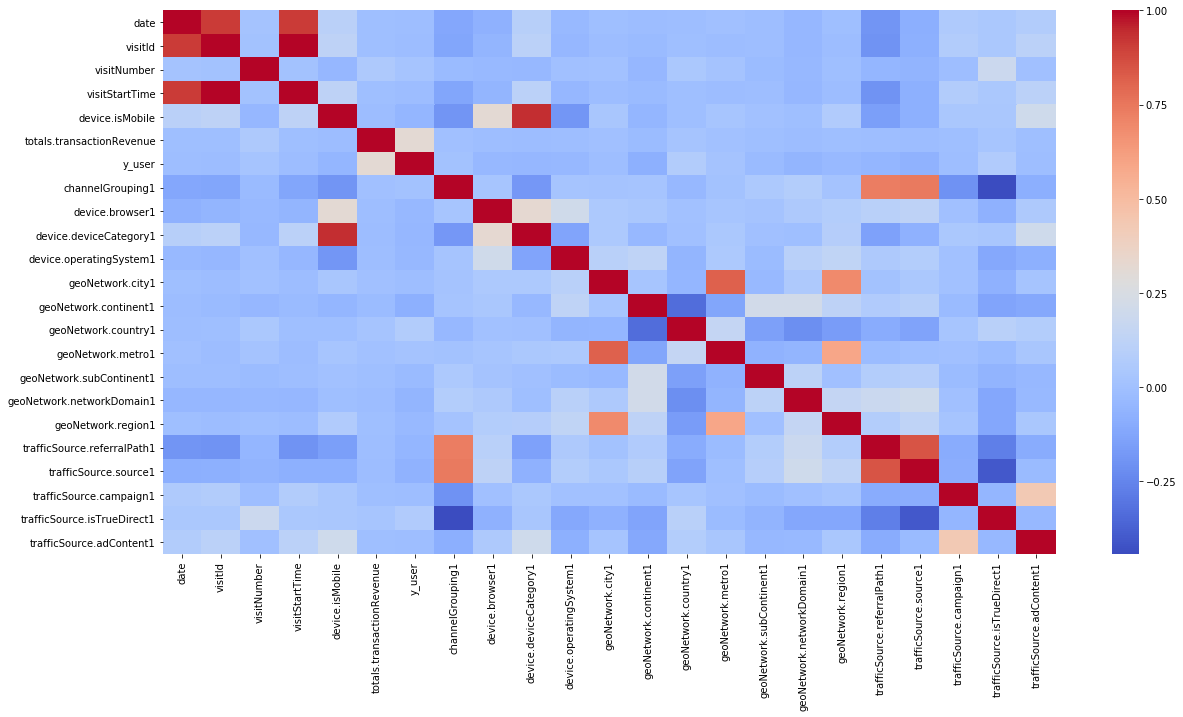

In [25]:
plt.figure(figsize=(20,10))
sns.heatmap(train_df.corr(),cmap='coolwarm')

# Exploratory Data analysis and visualisation

In [26]:
top10browsers=train_df['device.browser'].value_counts().index.tolist()[0:10]

In [27]:
train_df5=train_df[train_df['device.browser'].apply(lambda x: x in top10browsers)]

In [28]:
train_df5.head()

,channelGrouping,date,fullVisitorId,visitId,visitNumber,visitStartTime,device.browser,device.deviceCategory,device.isMobile,device.operatingSystem,geoNetwork.city,geoNetwork.continent,geoNetwork.country,geoNetwork.metro,geoNetwork.networkDomain,geoNetwork.region,geoNetwork.subContinent,totals.bounces,totals.hits,totals.newVisits,totals.pageviews,totals.transactionRevenue,trafficSource.adContent,trafficSource.campaign,trafficSource.isTrueDirect,trafficSource.keyword,trafficSource.medium,trafficSource.referralPath,trafficSource.source,y_user,channelGrouping1,device.browser1,device.deviceCategory1,device.operatingSystem1,geoNetwork.city1,geoNetwork.continent1,geoNetwork.country1,geoNetwork.metro1,geoNetwork.subContinent1,geoNetwork.networkDomain1,geoNetwork.region1,trafficSource.referralPath1,trafficSource.source1,trafficSource.campaign1,trafficSource.isTrueDirect1,trafficSource.adContent1
0,Organic Search,20171016,3162355547410993243,1508198450,1,1508198450,Firefox,desktop,False,Windows,not available in demo dataset,Europe,Germany,not available in demo dataset,(not set),not available in demo dataset,Western Europe,1,1,1,1,0.0,0,(not set),0,water bottle,organic,0,google,0.0,4,43,0,20,955,4,75,122,22,0,482,0,99,4,0,0
1,Referral,20171016,8934116514970143966,1508176307,6,1508176307,Chrome,desktop,False,Chrome OS,Cupertino,Americas,United States,San Francisco-Oakland-San Jose CA,(not set),California,Northern America,0,2,0,2,0.0,0,(not set),0,0,referral,/a/google.com/transportation/mtv-services/bike...,sites.google.com,0.0,6,35,0,3,220,2,218,100,12,0,73,301,301,4,0,0
2,Direct,20171016,7992466427990357681,1508201613,1,1508201613,Chrome,mobile,True,Android,not available in demo dataset,Americas,United States,not available in demo dataset,windjammercable.net,not available in demo dataset,Northern America,0,2,1,2,0.0,0,(not set),True,0,(none),0,(direct),0.0,2,35,1,1,955,2,218,122,12,40939,482,0,0,4,1,0
3,Organic Search,20171016,9075655783635761930,1508169851,1,1508169851,Chrome,desktop,False,Windows,not available in demo dataset,Asia,Turkey,not available in demo dataset,unknown.unknown,not available in demo dataset,Western Asia,0,2,1,2,0.0,0,(not set),0,(not provided),organic,0,google,0.0,4,35,0,20,955,3,210,122,21,38725,482,0,99,4,0,0
4,Organic Search,20171016,6960673291025684308,1508190552,1,1508190552,Chrome,desktop,False,Windows,not available in demo dataset,Americas,Mexico,not available in demo dataset,prod-infinitum.com.mx,not available in demo dataset,Central America,0,2,1,2,0.0,0,(not set),0,(not provided),organic,0,google,0.0,4,35,0,20,955,2,132,122,3,29216,482,0,99,4,0,0


# 'Top 10 Browser types vs Number of browser usage'

Text(0.5, 1.0, 'Top 10 Browser types vs Number of browser usage')

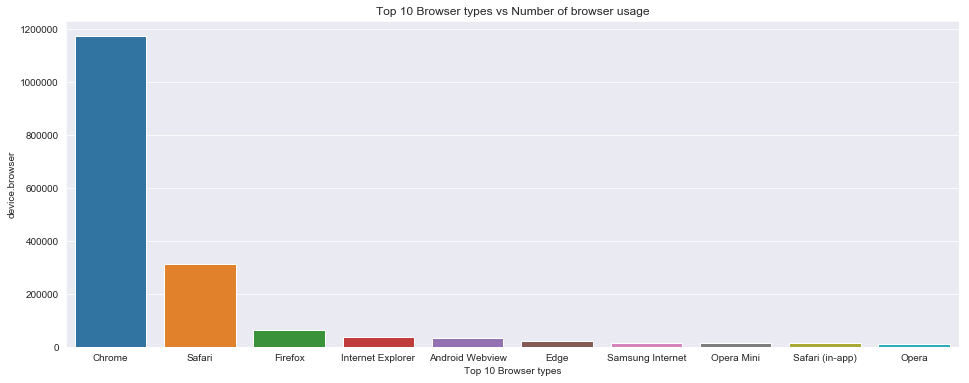

In [106]:
sns.set_style('darkgrid')
plt.figure(figsize=(16,6))
sns.barplot(top10browsers,train_df5['device.browser'].value_counts())
plt.xlabel('Top 10 Browser types')
plt.title('Top 10 Browser types vs Number of browser usage')

In [30]:
sum_TR=train_df5.groupby(by='device.browser')['totals.transactionRevenue'].sum()
sum_TR1=sum_TR.sort_values(ascending=False)
sum_TR1

device.browser
Chrome               2.068165e+12
Firefox              1.502462e+11
Safari               7.670099e+10
Internet Explorer    1.195796e+10
Edge                 8.067300e+09
Opera                5.947700e+08
Samsung Internet     2.208500e+08
Android Webview      1.861100e+08
Safari (in-app)      1.537700e+08
Opera Mini           0.000000e+00
Name: totals.transactionRevenue, dtype: float64

# 'Top 10 Browser types vs Transaction revenue'

Text(0.5, 1.0, 'Top 10 Browser types vs Transaction revenue')

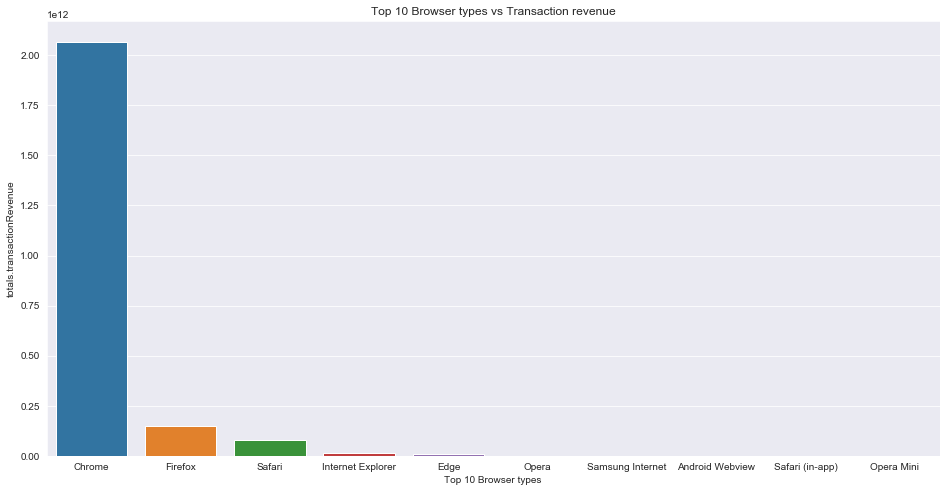

In [31]:
sns.set_style('darkgrid')
plt.figure(figsize=(16,8))
sns.barplot(sum_TR1.index,sum_TR1)
plt.xlabel('Top 10 Browser types')
plt.title('Top 10 Browser types vs Transaction revenue')

Text(0.5, 1.0, 'Date vs Transaction Revenue')

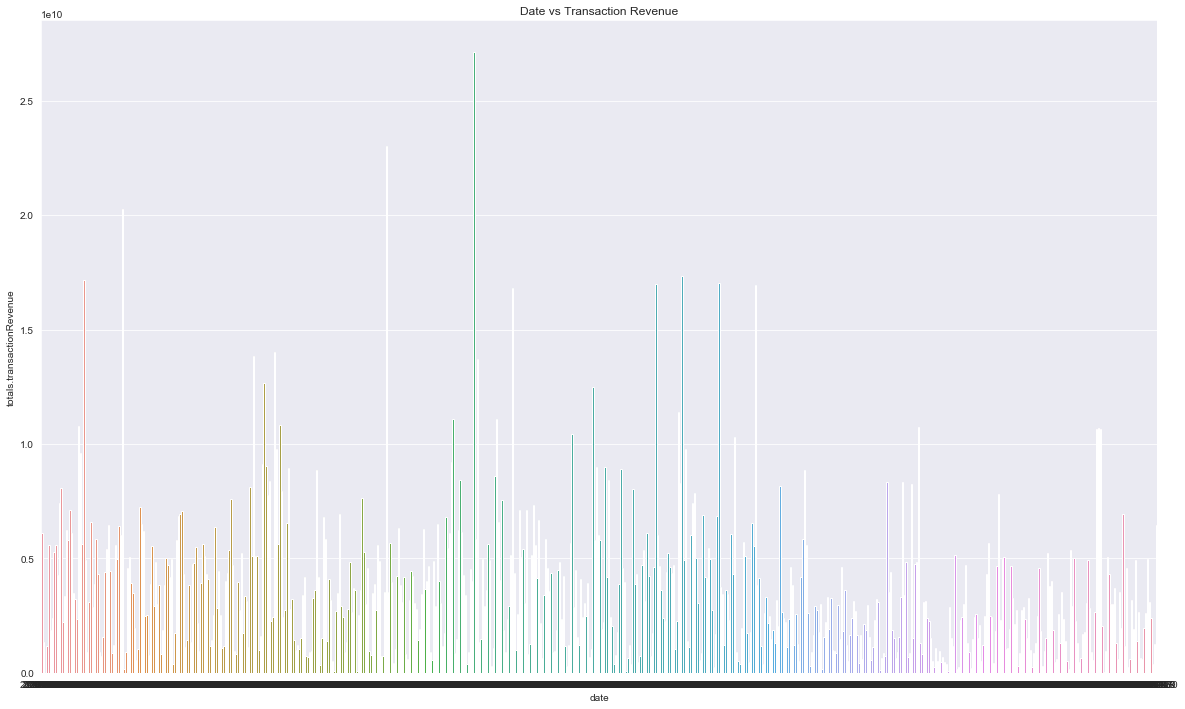

In [98]:
plt.figure(figsize=(20,12))
sns.barplot(train_df.groupby(by='date')['totals.transactionRevenue'].sum().index,
            train_df.groupby(by='date')['totals.transactionRevenue'].sum())
plt.title('Date vs Transaction Revenue')

In [33]:
train_df['device.deviceCategory'].unique()

array(['desktop', 'mobile', 'tablet'], dtype=object)

In [34]:
k=train_df.groupby('device.deviceCategory')['totals.transactionRevenue'].sum()

# 'Device Category vs Transaction Revenue'

Text(0.5, 1.0, 'Device Category vs Transaction Revenue')

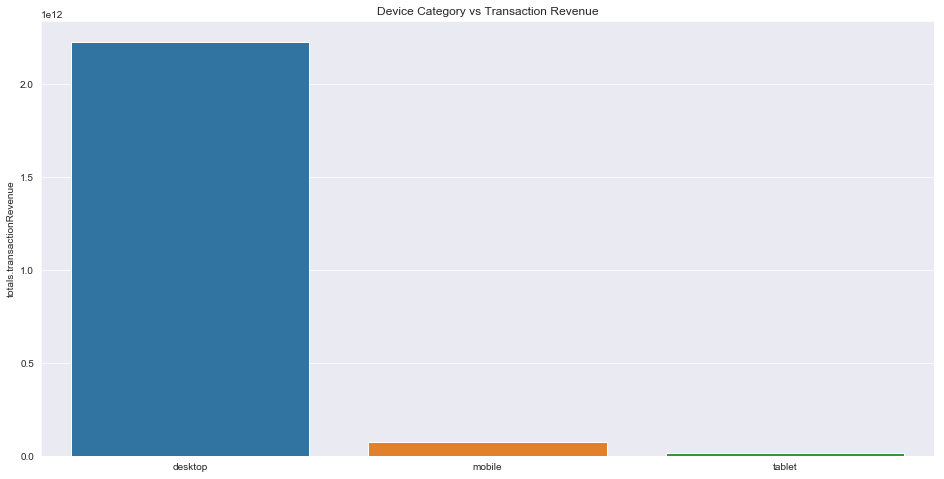

In [35]:
plt.figure(figsize=(16,8))
sns.barplot(k.index.tolist(),k)
plt.title('Device Category vs Transaction Revenue')

In [36]:
m=train_df.groupby('device.isMobile')['totals.transactionRevenue'].sum()

m.index

Index([False, True], dtype='object', name='device.isMobile')

# 'Mobile? vs Transaction Revenue'

Text(0.5, 1.0, 'Mobile? vs Transaction Revenue')

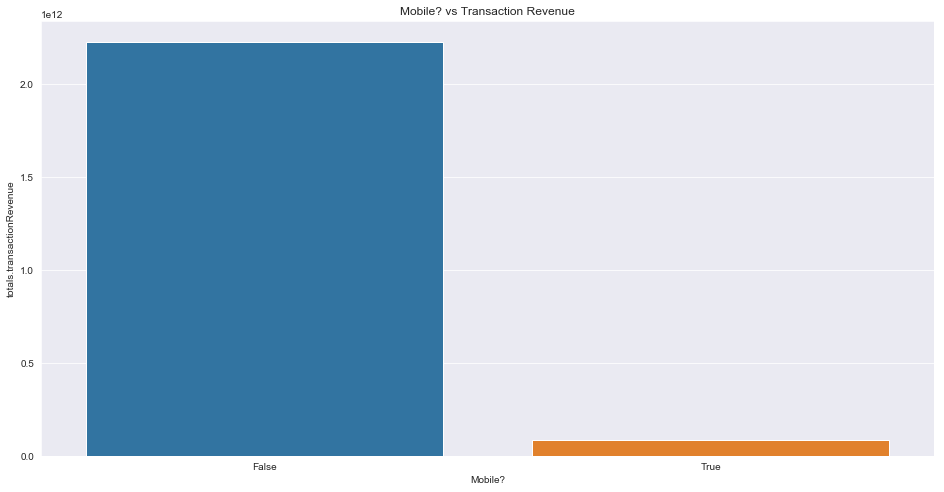

In [37]:
plt.figure(figsize=(16,8))
sns.barplot(m.index.tolist(),m)
plt.xlabel('Mobile?')
plt.title('Mobile? vs Transaction Revenue')

In [38]:
l=train_df['device.operatingSystem'].value_counts().index.tolist()[0:10]
l1=train_df[train_df['device.operatingSystem'].apply(lambda x: x in l)]
l3=l1.groupby('device.operatingSystem')['totals.transactionRevenue'].sum()
l4=l3.sort_values(ascending=False)

# 'Top 10 Operating System vs Transaction Revenue'

Text(0.5, 1.0, 'Top 10 Operating System vs Transaction Revenue')

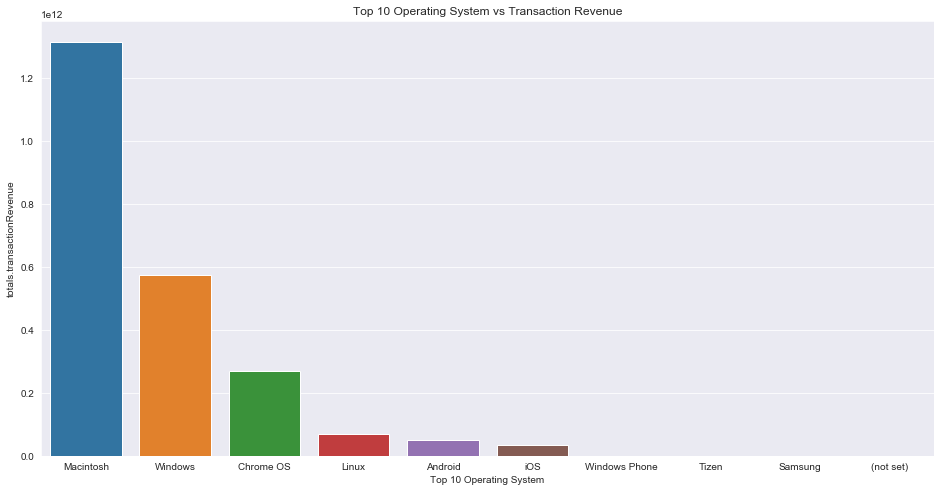

In [39]:
plt.figure(figsize=(16,8))
sns.barplot(l4.index.tolist(),l4)
plt.xlabel('Top 10 Operating System')
plt.title('Top 10 Operating System vs Transaction Revenue')

# 'Continent vs Transaction Revenue'

Text(0.5, 1.0, 'Continent vs Transaction Revenue')

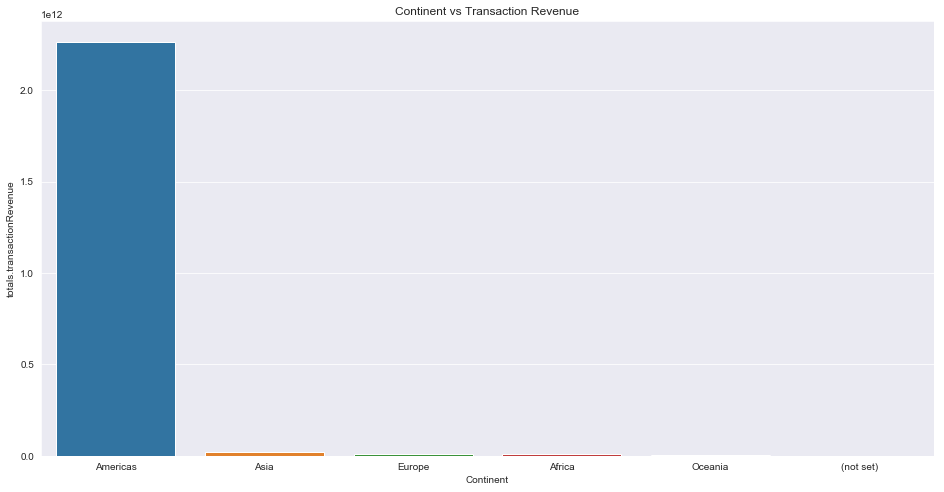

In [40]:
m=train_df.groupby('geoNetwork.continent')['totals.transactionRevenue'].sum()
m1=m.sort_values(ascending=False)
plt.figure(figsize=(16,8))
sns.barplot(m1.index.tolist(),m1)
plt.xlabel('Continent')
plt.title('Continent vs Transaction Revenue')

In [41]:
k=train_df['geoNetwork.country'].value_counts().index.tolist()[0:10]
k1=train_df[train_df['geoNetwork.country'].apply(lambda x: x in k)]
k2=k1.groupby('geoNetwork.country')['totals.transactionRevenue'].sum()
k3=k2.sort_values(ascending=False)
k3

geoNetwork.country
United States     2.197885e+12
Canada            4.269923e+10
Japan             7.361500e+09
United Kingdom    2.475040e+09
Brazil            2.022710e+09
India             1.336510e+09
France            1.070690e+09
Germany           7.682400e+08
Thailand          6.141600e+08
Vietnam           0.000000e+00
Name: totals.transactionRevenue, dtype: float64

# 'Countries vs Number of Usage'

Text(0.5, 1.0, 'Countries vs Number of Usage')

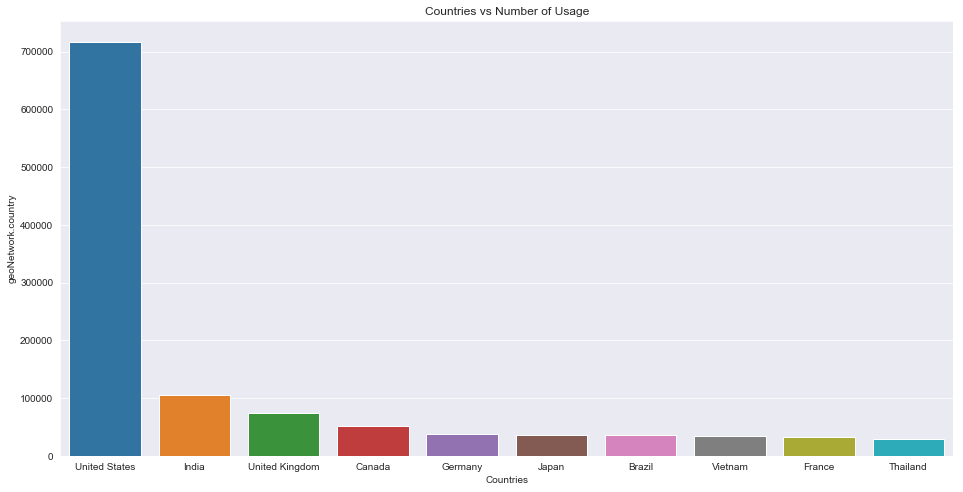

In [107]:
k6=k1['geoNetwork.country'].value_counts()

plt.figure(figsize=(16,8))
sns.barplot(k6.index,k6)
plt.xlabel('Countries')
plt.title('Countries vs Number of Usage')

# 'Countries vs Transaction Revenue'

Text(0.5, 1.0, 'Contries vs Transaction Revenue')

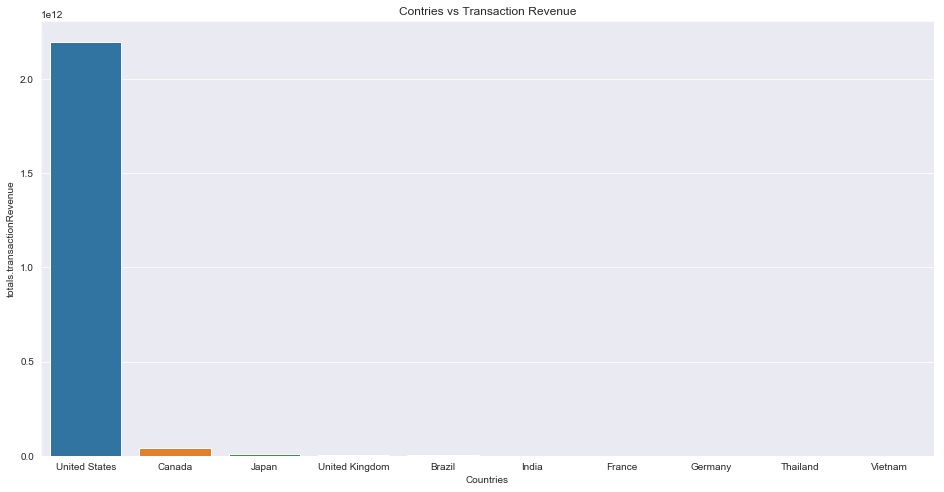

In [43]:
plt.figure(figsize=(16,8))
sns.barplot(k3.index,k3)
plt.xlabel('Countries')
plt.title('Contries vs Transaction Revenue')

# Machine learning model


In [44]:
from sklearn.model_selection import train_test_split

In [45]:
x=train_df.drop(['geoNetwork.region','geoNetwork.subContinent','trafficSource.keyword','trafficSource.medium',
                  'trafficSource.referralPath','trafficSource.source','geoNetwork.continent','geoNetwork.country','geoNetwork.metro',
                 'geoNetwork.networkDomain','channelGrouping','date','device.browser','device.deviceCategory','device.isMobile',
                 'device.operatingSystem','geoNetwork.city','trafficSource.campaign','trafficSource.isTrueDirect',
                 'y_user','trafficSource.adContent','totals.pageviews','visitStartTime','totals.transactionRevenue'],axis=1)


y=train_df['y_user']


x.fillna(0,inplace=True)

In [54]:
x['fullVisitorId']=x['fullVisitorId'].apply(lambda x: float(x))
x['totals.hits']=x['totals.hits'].apply(lambda x: float(x))
x['totals.bounces']=x['totals.bounces'].apply(lambda x: float(x))
x['totals.newVisits']=x['totals.newVisits'].apply(lambda x: float(x))

In [55]:
x.head()

,fullVisitorId,visitId,visitNumber,totals.bounces,totals.hits,totals.newVisits,channelGrouping1,device.browser1,device.deviceCategory1,device.operatingSystem1,geoNetwork.city1,geoNetwork.continent1,geoNetwork.country1,geoNetwork.metro1,geoNetwork.subContinent1,geoNetwork.networkDomain1,geoNetwork.region1,trafficSource.referralPath1,trafficSource.source1,trafficSource.campaign1,trafficSource.isTrueDirect1,trafficSource.adContent1
0,3.162356e+18,1508198450,1,1.0,1.0,1.0,4,43,0,20,955,4,75,122,22,0,482,0,99,4,0,0
1,8.934117e+18,1508176307,6,0.0,2.0,0.0,6,35,0,3,220,2,218,100,12,0,73,301,301,4,0,0
2,7.992466e+18,1508201613,1,0.0,2.0,1.0,2,35,1,1,955,2,218,122,12,40939,482,0,0,4,1,0
3,9.075656e+18,1508169851,1,0.0,2.0,1.0,4,35,0,20,955,3,210,122,21,38725,482,0,99,4,0,0
4,6.960673e+18,1508190552,1,0.0,2.0,1.0,4,35,0,20,955,2,132,122,3,29216,482,0,99,4,0,0


x['totals.newVisits']=x['totals.newVisits'].apply(lambda x: float(x))
x['totals.hits']=x['totals.hits'].apply(lambda x: float(x))
x['totals.bounces']=x['totals.bounces'].apply(lambda x: float(x))
x['fullVisitorId']=x['fullVisitorId'].apply(lambda x: float(x))

In [75]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.35)

In [427]:
x.head()

,fullVisitorId,visitId,visitNumber,totals.bounces,totals.hits,totals.newVisits,channelGrouping1,device.browser1,device.deviceCategory1,device.operatingSystem1,geoNetwork.city1,geoNetwork.continent1,geoNetwork.country1,geoNetwork.metro1,geoNetwork.subContinent1,geoNetwork.networkDomain1,geoNetwork.region1,trafficSource.referralPath1,trafficSource.source1,trafficSource.campaign1,trafficSource.isTrueDirect1,trafficSource.adContent1
0,3162355547410993243,1508198450,1,1,1,1,4,43,0,20,955,4,75,122,22,0,482,0,99,4,0,0
1,8934116514970143966,1508176307,6,0,2,0,6,35,0,3,220,2,218,100,12,0,73,301,301,4,0,0
2,7992466427990357681,1508201613,1,0,2,1,2,35,1,1,955,2,218,122,12,40939,482,0,0,4,1,0
3,9075655783635761930,1508169851,1,0,2,1,4,35,0,20,955,3,210,122,21,38725,482,0,99,4,0,0
4,6960673291025684308,1508190552,1,0,2,1,4,35,0,20,955,2,132,122,3,29216,482,0,99,4,0,0


In [428]:
x.shape

(1708337, 22)

In [429]:
y.shape

(1708337,)

x['totals.newVisits']=x['totals.newVisits'].apply(lambda x: float(x))
x['totals.hits']=x['totals.hits'].apply(lambda x: float(x))

x['totals.bounces']=x['totals.bounces'].apply(lambda x: float(x))
x['fullVisitorId']=x['fullVisitorId'].apply(lambda x: float(x))

In [109]:
from sklearn.ensemble import RandomForestRegressor

In [110]:
rfr = RandomForestRegressor(n_estimators=200)

In [111]:
rfr.fit(x_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [113]:
p = rfr.predict(x_test)

In [114]:
from sklearn import metrics

In [115]:
np.sqrt(metrics.mean_squared_error(y_test,p))

1.6159514237142814

In [53]:
%%time
test_df=load_df("F:\\Online Course\\datasets\\google customer revenue prediction\\test_v2.csv")

Loaded test_v2.csv. Shape: (100000, 59)
(100000, 29)
Loaded test_v2.csv. Shape: (100000, 59)
(200000, 29)
Loaded test_v2.csv. Shape: (100000, 59)
(300000, 29)
Loaded test_v2.csv. Shape: (100000, 59)
(400000, 29)
Loaded test_v2.csv. Shape: (1589, 59)
(401589, 29)
Wall time: 5min 47s


In [94]:
test_df.head()

,channelGrouping,date,fullVisitorId,visitId,visitNumber,visitStartTime,device.browser,device.deviceCategory,device.isMobile,device.operatingSystem,geoNetwork.city,geoNetwork.continent,geoNetwork.country,geoNetwork.metro,geoNetwork.networkDomain,geoNetwork.region,geoNetwork.subContinent,totals.bounces,totals.hits,totals.newVisits,totals.pageviews,totals.transactionRevenue,trafficSource.adContent,trafficSource.campaign,trafficSource.isTrueDirect,trafficSource.keyword,trafficSource.medium,trafficSource.referralPath,trafficSource.source,y_user,channelGrouping1,device.browser1,device.deviceCategory1,device.operatingSystem1,geoNetwork.city1,geoNetwork.continent1,geoNetwork.country1,geoNetwork.metro1,geoNetwork.subContinent1,geoNetwork.networkDomain1,geoNetwork.region1,trafficSource.referralPath1,trafficSource.source1,trafficSource.campaign1,trafficSource.isTrueDirect1,trafficSource.adContent1
0,Organic Search,20180511,7460955084541987166,1526099341,2,1526099341,Chrome,mobile,True,Android,(not set),Asia,India,(not set),unknown.unknown,Delhi,Southern Asia,0,4,0,3,0.0,(not set),(not set),True,(not provided),organic,(not set),google,0.0,4,25,1,1,0,3,86,0,18,14600,67,0,62,3,1,0
1,Direct,20180511,460252456180441002,1526064483,166,1526064483,Chrome,desktop,False,Macintosh,San Francisco,Americas,United States,San Francisco-Oakland-San Jose CA,(not set),California,Northern America,0,4,0,3,0.0,(not set),(not set),True,(not set),(none),(not set),(direct),0.0,2,25,0,7,389,2,200,69,12,0,37,0,0,3,1,0
2,Organic Search,20180511,3461808543879602873,1526067157,2,1526067157,Chrome,desktop,False,Chrome OS,not available in demo dataset,Americas,United States,not available in demo dataset,onlinecomputerworks.com,not available in demo dataset,Northern America,0,4,0,3,0.0,(not set),(not set),True,(not provided),organic,(not set),google,0.0,4,25,0,3,502,2,200,81,12,10224,268,0,62,3,1,0
3,Direct,20180511,975129477712150630,1526107551,4,1526107551,Chrome,mobile,True,iOS,Houston,Americas,United States,Houston TX,(not set),Texas,Northern America,0,5,0,4,0.0,(not set),(not set),True,(not set),(none),(not set),(direct),0.0,2,25,1,21,185,2,200,25,12,0,235,0,0,3,1,0
4,Organic Search,20180511,8381672768065729990,1526060254,1,1526060254,Internet Explorer,tablet,True,Windows,Irvine,Americas,United States,Los Angeles CA,com,California,Northern America,0,5,1,4,0.0,(not set),(not set),0,(not provided),organic,(not set),google,0.0,4,33,2,18,191,2,200,40,12,2897,37,0,62,3,0,0


# Apply all the transformations applied to the trainv2.csv file to testv2.csv file


In [95]:
test_df['totals.transactionRevenue'].fillna('0',inplace=True)
test_df['totals.transactionRevenue']=test_df['totals.transactionRevenue'].apply(lambda x: float(x))
test_df['y_user']=test_df['totals.transactionRevenue'].apply(lambda x:np.log(x+1))
test_df['totals.bounces'].fillna(0,inplace=True)
test_df['trafficSource.adContent'].fillna(0,inplace=True)
test_df['trafficSource.isTrueDirect'].fillna(0,inplace=True)
test_df['trafficSource.keyword'].fillna(0,inplace=True)
test_df['trafficSource.referralPath'].fillna(0,inplace=True)
test_df['totals.newVisits'].fillna(0,inplace=True)
test_df['channelGrouping1']=test_df['channelGrouping'].astype('category').cat.codes

test_df['device.browser1']=test_df['device.browser'].astype('category').cat.codes

test_df['device.deviceCategory1']=test_df['device.deviceCategory'].astype('category').cat.codes

test_df['device.operatingSystem1']=test_df['device.operatingSystem'].astype('category').cat.codes

test_df['geoNetwork.city1']=test_df['geoNetwork.city'].astype('category').cat.codes

test_df['geoNetwork.continent1']=test_df['geoNetwork.continent'].astype('category').cat.codes

test_df['geoNetwork.country1']=test_df['geoNetwork.country'].astype('category').cat.codes

test_df['geoNetwork.metro1']=test_df['geoNetwork.metro'].astype('category').cat.codes

test_df['geoNetwork.subContinent1']=test_df['geoNetwork.subContinent'].astype('category').cat.codes

test_df['geoNetwork.networkDomain1']=test_df['geoNetwork.networkDomain'].astype('category').cat.codes

test_df['geoNetwork.region1']=test_df['geoNetwork.region'].astype('category').cat.codes

test_df['trafficSource.referralPath1']=test_df['trafficSource.referralPath'].astype('category').cat.codes

test_df['trafficSource.source1']=test_df['trafficSource.source'].astype('category').cat.codes

test_df['trafficSource.campaign1']=test_df['trafficSource.campaign'].astype('category').cat.codes

test_df['trafficSource.isTrueDirect1']=test_df['trafficSource.isTrueDirect'].astype('category').cat.codes

test_df['trafficSource.adContent1']=test_df['trafficSource.adContent'].astype('category').cat.codes



In [88]:
test_df.head()

,channelGrouping,date,fullVisitorId,visitId,visitNumber,visitStartTime,device.browser,device.deviceCategory,device.isMobile,device.operatingSystem,geoNetwork.city,geoNetwork.continent,geoNetwork.country,geoNetwork.metro,geoNetwork.networkDomain,geoNetwork.region,geoNetwork.subContinent,totals.bounces,totals.hits,totals.newVisits,totals.pageviews,totals.transactionRevenue,trafficSource.adContent,trafficSource.campaign,trafficSource.isTrueDirect,trafficSource.keyword,trafficSource.medium,trafficSource.referralPath,trafficSource.source,y_user,channelGrouping1,device.browser1,device.deviceCategory1,device.operatingSystem1,geoNetwork.city1,geoNetwork.continent1,geoNetwork.country1,geoNetwork.metro1,geoNetwork.subContinent1,geoNetwork.networkDomain1,geoNetwork.region1,trafficSource.referralPath1,trafficSource.source1,trafficSource.campaign1,trafficSource.isTrueDirect1,trafficSource.adContent1
0,Organic Search,20180511,7460955084541987166,1526099341,2,1526099341,Chrome,mobile,True,Android,(not set),Asia,India,(not set),unknown.unknown,Delhi,Southern Asia,0,4,0,3,0.0,(not set),(not set),True,(not provided),organic,(not set),google,0.0,4,25,1,1,0,3,86,0,18,14600,67,0,62,3,1,0
1,Direct,20180511,460252456180441002,1526064483,166,1526064483,Chrome,desktop,False,Macintosh,San Francisco,Americas,United States,San Francisco-Oakland-San Jose CA,(not set),California,Northern America,0,4,0,3,0.0,(not set),(not set),True,(not set),(none),(not set),(direct),0.0,2,25,0,7,389,2,200,69,12,0,37,0,0,3,1,0
2,Organic Search,20180511,3461808543879602873,1526067157,2,1526067157,Chrome,desktop,False,Chrome OS,not available in demo dataset,Americas,United States,not available in demo dataset,onlinecomputerworks.com,not available in demo dataset,Northern America,0,4,0,3,0.0,(not set),(not set),True,(not provided),organic,(not set),google,0.0,4,25,0,3,502,2,200,81,12,10224,268,0,62,3,1,0
3,Direct,20180511,975129477712150630,1526107551,4,1526107551,Chrome,mobile,True,iOS,Houston,Americas,United States,Houston TX,(not set),Texas,Northern America,0,5,0,4,0.0,(not set),(not set),True,(not set),(none),(not set),(direct),0.0,2,25,1,21,185,2,200,25,12,0,235,0,0,3,1,0
4,Organic Search,20180511,8381672768065729990,1526060254,1,1526060254,Internet Explorer,tablet,True,Windows,Irvine,Americas,United States,Los Angeles CA,com,California,Northern America,0,5,1,4,0.0,(not set),(not set),0,(not provided),organic,(not set),google,0.0,4,33,2,18,191,2,200,40,12,2897,37,0,62,3,0,0


In [89]:
test_df['totals.transactionRevenue'].nunique()

1951

In [90]:
x1=test_df.drop(['geoNetwork.region','geoNetwork.subContinent','trafficSource.keyword','trafficSource.medium',
                  'trafficSource.referralPath','trafficSource.source','geoNetwork.continent','geoNetwork.country','geoNetwork.metro',
                 'geoNetwork.networkDomain','channelGrouping','date','device.browser','device.deviceCategory','device.isMobile',
                 'device.operatingSystem','geoNetwork.city','trafficSource.campaign','trafficSource.isTrueDirect',
                 'y_user','trafficSource.adContent','totals.pageviews','visitStartTime','totals.transactionRevenue'],axis=1)


y1=test_df['y_user']


In [91]:
x1['fullVisitorId']=x1['fullVisitorId'].apply(lambda x: float(x))
x1['totals.hits']=x1['totals.hits'].apply(lambda x: float(x))
x1['totals.bounces']=x1['totals.bounces'].apply(lambda x: float(x))
x1['totals.newVisits']=x1['totals.newVisits'].apply(lambda x: float(x))

In [92]:
test_y = gbr.predict(x1)
x1['final1']=gbr.predict(x1)

# Finally, apply log inverse to the predicted value and take the sum of total transaction value with respect to fullVisitorId, then take log of it and save it.

In [93]:
test_y[test_y<0]=0
final_df=pd.DataFrame(test_df.fullVisitorId.values,columns=["fullVisitorId"])
final_df['total.transaction']=test_y
final_df['total.transaction']=final_df['total.transaction'].apply(lambda x:np.exp(x+1))
final_df=final_df.groupby('fullVisitorId')['total.transaction'].sum().reset_index()
final_df['PredictedLogRevenue']=final_df['total.transaction'].apply(lambda x: np.log(x+1))
final_df.drop('total.transaction',axis=1,inplace=True)
final_df.to_csv('final6.csv',index=False)
final_df


,fullVisitorId,PredictedLogRevenue
0,0000018966949534117,1.321326
1,0000039738481224681,1.319025
2,0000073585230191399,1.313262
3,0000087588448856385,1.313262
4,0000149787903119437,1.313262
5,0000196310838896290,1.807576
6,00001995526696366,1.313262
7,0000255704530917106,1.313262
8,0000268499301061358,1.319491
9,0000276747989270229,1.320758
